In [ ]:
# ### Install packages ###
# !pip install dp-cgans ### generative model package (Chang) Repo: https://github.com/sunchang0124/dp_cgans Paper: https://doi.org/10.1016/j.jbi.2023.104404
# !pip install rdt==1.9.0 ### data transformer package
# !pip install sdv==1.6.0 ### data generation framework package

## Learn: DP-CGANS Model (Differential-private Conditional GAN)


In [ ]:
import pandas as pd
from dp_cgans import DP_CGAN

### Load a dataset ###
### A Alzheimer's Disease Dataset from Kaggle ###
url='https://drive.google.com/file/d/1053Y9qjnI3GVAnXLe39d0qVJ7Evvftz_/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
real_data = pd.read_csv(url)

In [ ]:
real_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
### If you need to map values to categorical variables
### real_data['Gender'] = real_data['Gender'].map({0: 'Male', 1: 'Female'})
### real_data['Ethnicity'] = real_data['Ethnicity'].map({0: 'Caucasian', 1: 'African American', 2:'Asian', 3:'Other'})
### real_data['EducationLevel'] = real_data['EducationLevel'].map({0: None, 1: 'High School', 2:'Bachelor', 3:'Higher'})

In [ ]:
### Set hypter-parameters for the model. The default parameters are set for efficient running ###
model = DP_CGAN(
   epochs=100, # number of training epochs
   batch_size=120, # the size of each batch
   log_frequency=True,
   verbose=True,
   generator_dim=(256, 256, 256),
   discriminator_dim=(256, 256, 256),
   generator_lr=2e-5,
   discriminator_lr=2e-5,
   discriminator_steps=10,
   private=False,
   wandb=False,
)

print("Start training model")
model.fit(real_data)

### Save the generative model to local
### model.save("generator.pkl")

Start training model


Gen. (1.08) | Discrim. (-0.80): 100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


In [ ]:
### Generate n synthetic rows
### save the synthetic data to a local file
syn_data = model.sample(len(real_data))
syn_data.to_csv("syn_data_file.csv")

In [ ]:
syn_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,66,18,2.076848,23.213958,0.472376,1866,0.674765,0.976534
1,Nondemented,M,87,10,NaN,26.308026,-0.030343,1530,0.769226,1.116670
2,Nondemented,M,67,10,2.253527,29.764513,-0.030947,1588,0.706639,1.582504
3,Nondemented,M,90,16,1.357839,25.303495,0.493145,1622,0.833424,1.100078
4,Nondemented,M,79,16,2.897683,28.482241,0.484392,1402,0.727559,1.383759
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,79,10,2.977936,28.312429,0.031079,1375,0.676841,1.120098
369,Nondemented,M,92,19,0.577580,28.833785,0.042933,1489,0.664401,1.294687
370,Nondemented,M,82,8,1.940687,28.220499,0.056989,1819,0.785445,1.472460
371,Nondemented,M,72,18,0.548795,28.145338,-0.111716,1654,0.737454,1.168860


# Evaluation

In [ ]:
### Visualize single variable distribution (Real vs Synthetic) ###

from sdmetrics.visualization import get_column_plot
from matplotlib import pyplot as plt

def column_dist(real_data, synthetic_data, column_name):
  fig = get_column_plot(
      real_data=real_data,
      synthetic_data=synthetic_data,
      column_name=column_name,
      plot_type='distplot',
  )

  fig.show()

In [ ]:
column_dist(real_data, syn_data, "MMSE")

In [ ]:
column_dist(real_data, syn_data, "ASF")

In [ ]:
column_dist(real_data, syn_data, "SES")

In [ ]:
column_dist(real_data, syn_data, "nWBV")

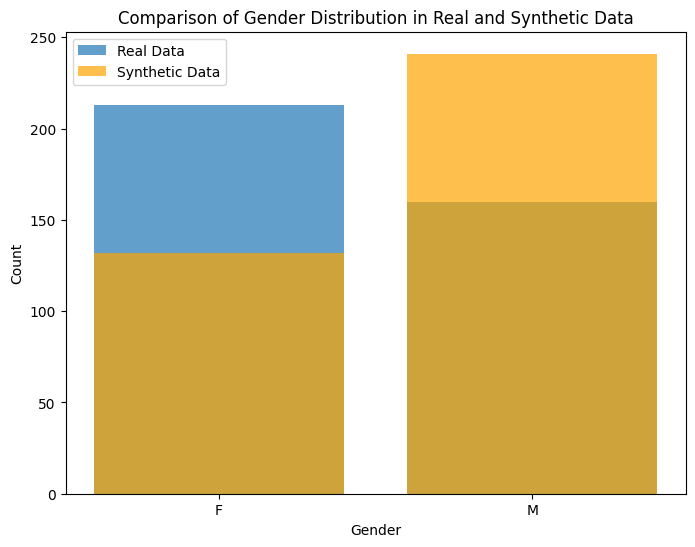

In [ ]:
### Visualize single categorical variable (Real vs Synthetic) ###

import matplotlib.pyplot as plt

# Count the occurrences of each gender in real_data
real_gender_counts = real_data['M/F'].value_counts()

# Count the occurrences of each gender in syn_data
syn_gender_counts = syn_data['M/F'].value_counts()

# Create a bar plot for both real and synthetic data
plt.figure(figsize=(8, 6))

plt.bar(real_gender_counts.index, real_gender_counts.values, label='Real Data', alpha=0.7)
plt.bar(syn_gender_counts.index, syn_gender_counts.values, label='Synthetic Data', alpha=0.7, color='orange')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Gender Distribution in Real and Synthetic Data')
plt.legend()

plt.show()


# Use other generative models from SDV framework ###

In [ ]:
# from sdv.metadata import Metadata
from sdv.metadata import SingleTableMetadata

from sdv.single_table import CTGANSynthesizer

# from sdv.single_table import CopulaGANSynthesizer
# from sdv.single_table import GaussianCopulaSynthesizer
# from sdv.single_table import TVAESynthesizer

In [ ]:
# Step 1: Get metadata of the data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)

In [ ]:
CTGAN = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=300,
    verbose=True
)

In [ ]:
CTGAN.fit(real_data)

CTGAN_data = CTGAN.sample(num_rows=len(real_data))

Gen. (-1.23) | Discrim. (-0.04): 100%|██████████| 300/300 [00:27<00:00, 11.07it/s]


In [ ]:
column_dist(real_data, CTGAN_data, "MMSE")

In [ ]:
column_dist(real_data, CTGAN_data, "SES")

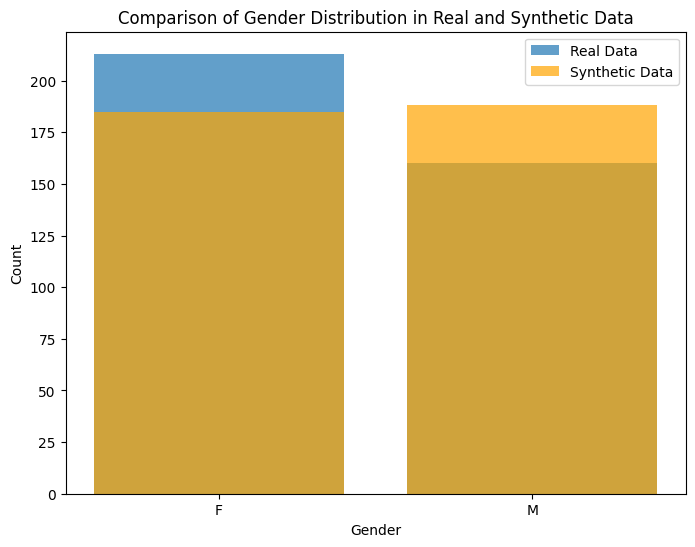

In [ ]:
### Visualize single categorical variable (Real vs Synthetic) ###

import matplotlib.pyplot as plt

# Count the occurrences of each gender in real_data
real_gender_counts = real_data['M/F'].value_counts()

# Count the occurrences of each gender in syn_data
syn_gender_counts = syn_data['M/F'].value_counts()

# Create a bar plot for both real and synthetic data
plt.figure(figsize=(8, 6))

plt.bar(real_gender_counts.index, real_gender_counts.values, label='Real Data', alpha=0.7)
plt.bar(syn_gender_counts.index, syn_gender_counts.values, label='Synthetic Data', alpha=0.7, color='orange')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Gender Distribution in Real and Synthetic Data')
plt.legend()

plt.show()


In [ ]:
### Visualize correlation differences (Real vs Synthetic) ###

In [ ]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

def evaluationReport(target_data, syn_data):

    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=target_data)

    diagnostic_report = run_diagnostic(real_data=target_data, synthetic_data=syn_data, metadata=metadata)
    quality_report = evaluate_quality(real_data=target_data, synthetic_data=syn_data, metadata=metadata)

    return diagnostic_report, quality_report

In [ ]:
evaluationReport(real_data, CTGAN_data)

Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:04<00:00,  4.24s/it]

Diagnostic Results:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data
✓ Over 90% of the synthetic rows are not copies of the real data
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:00<00:00, 60.84it/s]

Overall Quality Score: 78.27%

Properties:
- Column Shapes: 80.65%
- Column Pair Trends: 75.88%


(<sdmetrics.reports.single_table.diagnostic_report.DiagnosticReport at 0x7baed881c950>,
 <sdmetrics.reports.single_table.quality_report.QualityReport at 0x7baed7ae4a90>)

In [ ]:
diagnostic_report, quality_report = evaluationReport(real_data, CTGAN_data)
diagnostic_report.get_details(property_name='Coverage') #'Coverage', 'Boundary', 'Synthesis'.

Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:09<00:00,  9.10s/it]

Diagnostic Results:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data
✓ Over 90% of the synthetic rows are not copies of the real data
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:00<00:00, 81.21it/s]

Overall Quality Score: 78.27%

Properties:
- Column Shapes: 80.65%
- Column Pair Trends: 75.88%


,Column,Metric,Score
0,Group,CategoryCoverage,1.000000
1,M/F,CategoryCoverage,1.000000
2,Age,RangeCoverage,0.921053
3,EDUC,RangeCoverage,1.000000
4,SES,CategoryCoverage,1.000000
5,MMSE,RangeCoverage,1.000000
6,CDR,RangeCoverage,0.709621
7,eTIV,RangeCoverage,1.000000
8,nWBV,RangeCoverage,1.000000
9,ASF,RangeCoverage,1.000000


In [ ]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,Group,M/F,ContingencySimilarity,0.903485,NaN,NaN
1,Group,Age,ContingencySimilarity,0.597855,NaN,NaN
2,Group,EDUC,ContingencySimilarity,0.592493,NaN,NaN
3,Group,SES,ContingencySimilarity,0.825737,NaN,NaN
4,Group,MMSE,ContingencySimilarity,0.680965,NaN,NaN
5,Group,CDR,ContingencySimilarity,0.195710,NaN,NaN
6,Group,eTIV,ContingencySimilarity,0.734584,NaN,NaN
7,Group,nWBV,ContingencySimilarity,0.697051,NaN,NaN
8,Group,ASF,ContingencySimilarity,0.785523,NaN,NaN
9,M/F,Age,ContingencySimilarity,0.624665,NaN,NaN


In [ ]:
quality_report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,Group,TVComplement,0.981233
1,M/F,TVComplement,0.959786
2,Age,KSComplement,0.584450
3,EDUC,KSComplement,0.831099
4,SES,TVComplement,0.929851
5,MMSE,KSComplement,0.829442
6,CDR,KSComplement,0.517426
7,eTIV,KSComplement,0.865952
8,nWBV,KSComplement,0.737265
9,ASF,KSComplement,0.828418


In [ ]:
# Train machine learning models

In [ ]:
from sdmetrics.single_table import BinaryLogisticRegression,\
BinaryDecisionTreeClassifier, BinaryAdaBoostClassifier, BinaryMLPClassifier
 #LogisticDetection,
def ml_eva_for_all(syn_list,exp_data):

    metricx = {'LR':BinaryLogisticRegression,
               'DT':BinaryDecisionTreeClassifier,
               'ADA':BinaryAdaBoostClassifier,
               'MLP':BinaryMLPClassifier} #'LD':LogisticDetection,
    MLevaluation = {}
    for clf in metricx:

        evaluation_results = {}
        for each_syn_data in syn_list:
            if clf in ['LD']:
                evaluation_results[each_syn_data] = metricx[clf].compute(exp_data, syn_list[each_syn_data])
            else:
                evaluation_results[each_syn_data] = metricx[clf].compute(exp_data, syn_list[each_syn_data], target='label')

        MLevaluation[clf] = evaluation_results

    return MLevaluation


In [ ]:
syn_list = {'dpcgans':dpcgans_syn,
            'ctgan':ctgan_syn,
            'xxx':model_xxx_syn}

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(real_data, real_data['label']):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = real_data.iloc[train_index], real_data.iloc[test_index]


syn_list["real"]=X_train
ML_evaluation_results = ml_eva_for_all(syn_list,X_test)